<a href="https://colab.research.google.com/github/ABDELLAH-Hallou/students_performance/blob/master/students_perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline

In [31]:
#Now let's import and put the train dataset in  pandas dataframe
dt_students_mat = pd.read_csv("/content/drive/MyDrive/project/student-math.csv")
dt_students_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [32]:
#display the first five rows of the train dataset.
dt_students_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [33]:
# set seed for reproducibility
np.random.seed(0) 

In [34]:
dt_students_mat.head(395)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [35]:
# get the number of missing data points per column
missing_value_count = dt_students_mat.isnull().sum()
print(missing_value_count)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [36]:
# how many total missing values do we have?
total_cells = np.product(dt_students_mat.shape)
total_missing = missing_value_count.sum()
total_missing

0

In [37]:
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

Text(0.5, 1.0, 'Scaled data')

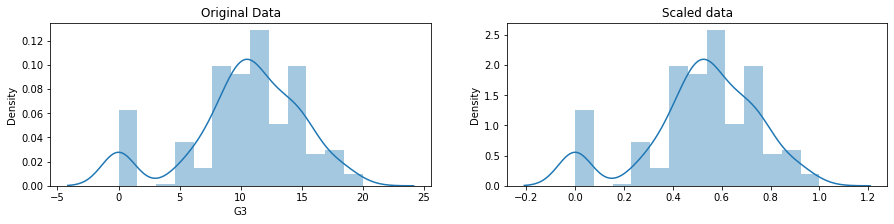

In [38]:
# select the final grade column
original_G3_data = pd.DataFrame(dt_students_mat.G3)

# scale the grads from 0 to 1
scaled_G3_data = minmax_scaling(original_G3_data, columns=['G3'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G3, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G3_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [39]:
print('Original data\nPreview:\n', original_G3_data.head())
print('Minimum value:', float(original_G3_data.min()),
      '\nMaximum value:', float(original_G3_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G3_data.head())
print('Minimum value:', float(scaled_G3_data.min()),
      '\nMaximum value:', float(scaled_G3_data.max()))

Original data
Preview:
    G3
0   6
1   6
2  10
3  15
4  10
Minimum value: 0.0 
Maximum value: 20.0
______________________________

Scaled data
Preview:
      G3
0  0.30
1  0.30
2  0.50
3  0.75
4  0.50
Minimum value: 0.0 
Maximum value: 1.0


Text(0.5, 1.0, 'Scaled data')

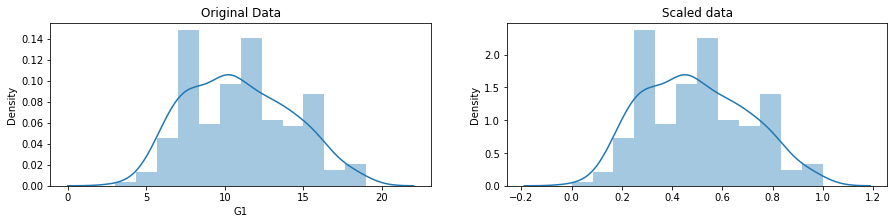

In [40]:
# select the G1 grade column
original_G1_data = pd.DataFrame(dt_students_mat.G1)

# scale the G1 grade from 0 to 1
scaled_G1_data = minmax_scaling(original_G1_data, columns=['G1'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G1, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G1_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [41]:
print('Original data\nPreview:\n', original_G1_data.head())
print('Minimum value:', float(original_G1_data.min()),
      '\nMaximum value:', float(original_G1_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G1_data.head())
print('Minimum value:', float(scaled_G1_data.min()),
      '\nMaximum value:', float(scaled_G1_data.max()))

Original data
Preview:
    G1
0   5
1   5
2   7
3  15
4   6
Minimum value: 3.0 
Maximum value: 19.0
______________________________

Scaled data
Preview:
        G1
0  0.1250
1  0.1250
2  0.2500
3  0.7500
4  0.1875
Minimum value: 0.0 
Maximum value: 1.0


Text(0.5, 1.0, 'Scaled data')

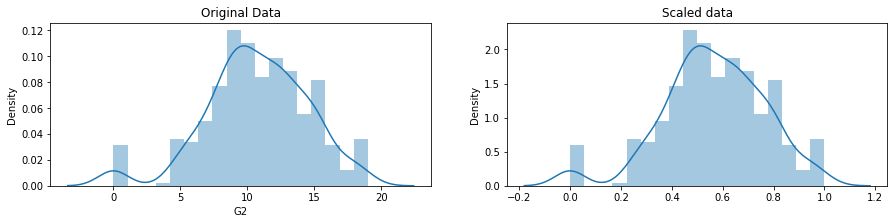

In [42]:
# select the G2 grade column
original_G2_data = pd.DataFrame(dt_students_mat.G2)

# scale the grads from 0 to 1
scaled_G2_data = minmax_scaling(original_G2_data, columns=['G2'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.G2, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_G2_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [43]:
print('Original data\nPreview:\n', original_G2_data.head())
print('Minimum value:', float(original_G2_data.min()),
      '\nMaximum value:', float(original_G2_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_G2_data.head())
print('Minimum value:', float(scaled_G2_data.min()),
      '\nMaximum value:', float(scaled_G2_data.max()))

Original data
Preview:
    G2
0   6
1   5
2   8
3  14
4  10
Minimum value: 0.0 
Maximum value: 19.0
______________________________

Scaled data
Preview:
          G2
0  0.315789
1  0.263158
2  0.421053
3  0.736842
4  0.526316
Minimum value: 0.0 
Maximum value: 1.0


Text(0.5, 1.0, 'Scaled data')

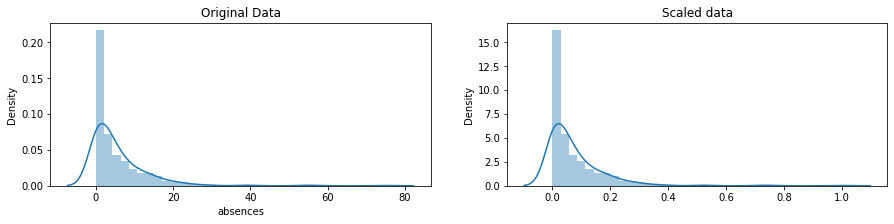

In [44]:
# select the absences column
original_absences_data = pd.DataFrame(dt_students_mat.absences)

# scale the absences from 0 to 1
scaled_absences_data = minmax_scaling(original_absences_data, columns=['absences'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(dt_students_mat.absences, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_absences_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [45]:
print('Original data\nPreview:\n', original_absences_data.head())
print('Minimum value:', float(original_absences_data.min()),
      '\nMaximum value:', float(original_absences_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_absences_data.head())
print('Minimum value:', float(scaled_absences_data.min()),
      '\nMaximum value:', float(scaled_absences_data.max()))

Original data
Preview:
    absences
0         6
1         4
2        10
3         2
4         4
Minimum value: 0.0 
Maximum value: 75.0
______________________________

Scaled data
Preview:
    absences
0  0.080000
1  0.053333
2  0.133333
3  0.026667
4  0.053333
Minimum value: 0.0 
Maximum value: 1.0


In [46]:
# get all the unique values in the column
school = dt_students_mat['school'].unique()
sex = dt_students_mat['sex'].unique()
address = dt_students_mat['address'].unique()
famsize = dt_students_mat['famsize'].unique()
Pstatus = dt_students_mat['Pstatus'].unique()
Mjob = dt_students_mat['Mjob'].unique()
Fjob = dt_students_mat['Fjob'].unique()
reason = dt_students_mat['reason'].unique()
guardian = dt_students_mat['guardian'].unique()
# sort them alphabetically and then take a closer look
school.sort()
sex.sort()
address.sort()
famsize.sort()
Pstatus.sort()
Mjob.sort()
Fjob.sort()
reason.sort()
guardian.sort()
print("school",school)
print("sex",sex)
print("address",address)
print("famsize",famsize)
print("Pstatus",Pstatus)
print("Mjob",Mjob)
print("Fjob",Fjob)
print("reason",reason)
print("guardian",guardian)

school ['GP' 'MS']
sex ['F' 'M']
address ['R' 'U']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['at_home' 'health' 'other' 'services' 'teacher']
reason ['course' 'home' 'other' 'reputation']
guardian ['father' 'mother' 'other']


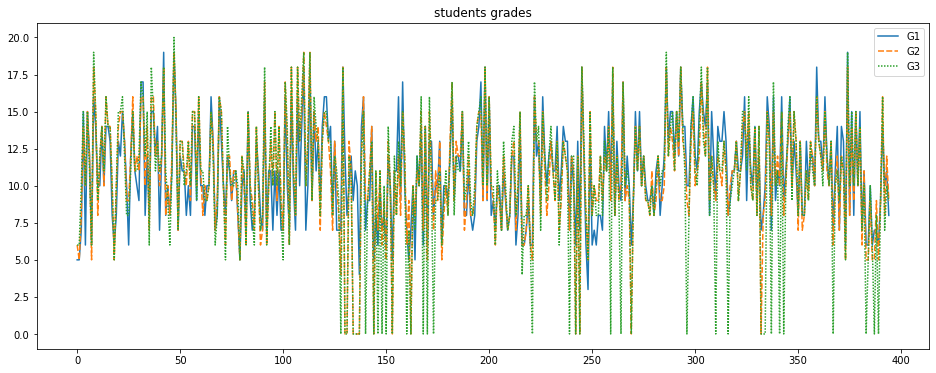

In [47]:
plt.figure(figsize=(16,6))
# Add title
plt.title("students grades")
df = pd.DataFrame({'G1':[i for i in dt_students_mat["G1"]],
                   'G2':[i for i in dt_students_mat["G2"]],
                   'G3':[i for i in dt_students_mat["G3"]]})
# data
sns.lineplot(data=df)


In [48]:
print(list(dt_students_mat))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [49]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 
 'freetime', 'goout', 'Dalc', 'Walc', 'health']
df_std = dt_students_mat[features]
df_std["absences"]=scaled_absences_data
df_std["G1"]=scaled_G1_data
df_std["G2"]=scaled_G2_data
df_std["G3"]=scaled_G3_data
df_std.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,0.080000,0.1250,0.315789,0.30
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,0.053333,0.1250,0.263158,0.30
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,0.133333,0.2500,0.421053,0.50
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0.026667,0.7500,0.736842,0.75
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0.053333,0.1875,0.526316,0.50


In [50]:
data_dum=df_std
# yes no
categorical_d = {'yes': 1, 'no': 0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(categorical_d)
data_dum['famsup'] = data_dum['famsup'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)
data_dum['nursery'] = data_dum['nursery'].map(categorical_d)
data_dum['higher'] = data_dum['higher'].map(categorical_d)
data_dum['internet'] = data_dum['internet'].map(categorical_d)
data_dum['romantic'] = data_dum['romantic'].map(categorical_d)
# binary
categorical_d = {'GP': 1, 'MS': 0}
data_dum['school'] = data_dum['school'].map(categorical_d)
categorical_d = {'M': 1, 'F': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)
categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)
categorical_d = {'GT3': 1, 'LE3': 0}
data_dum['famsize'] = data_dum['famsize'].map(categorical_d)
categorical_d = {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(categorical_d)
# nominal
categorical_d= {'at_home': 0, 'health': 1, 'services': 2,'teacher': 3,'other':4}
data_dum['Fjob'] = data_dum['Fjob'].map(categorical_d)
categorical_d= {'at_home': 0, 'health': 1, 'services': 2,'teacher': 3,'other':4}
data_dum['Mjob'] = data_dum['Mjob'].map(categorical_d)
categorical_d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(categorical_d)
categorical_d= {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)
df_std.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,0,4,4,0,3,...,4,3,4,1,1,3,0.080000,0.1250,0.315789,0.30
1,1,0,17,1,1,1,1,1,0,4,...,5,3,3,1,1,3,0.053333,0.1250,0.263158,0.30
2,1,0,15,1,0,1,1,1,0,4,...,4,3,2,2,3,3,0.133333,0.2500,0.421053,0.50
3,1,0,15,1,1,1,4,2,1,2,...,3,2,2,1,1,5,0.026667,0.7500,0.736842,0.75
4,1,0,16,1,1,1,3,3,4,4,...,4,3,2,1,2,5,0.053333,0.1875,0.526316,0.50
5,1,1,16,1,0,1,4,3,2,4,...,5,4,2,1,2,5,0.133333,0.7500,0.789474,0.75
6,1,1,16,1,0,1,2,2,4,4,...,4,4,4,1,1,3,0.000000,0.5625,0.631579,0.55
7,1,0,17,1,1,0,4,4,4,3,...,4,1,4,1,1,1,0.080000,0.1875,0.263158,0.30
8,1,1,15,1,0,0,3,2,2,4,...,4,2,2,1,1,1,0.000000,0.8125,0.947368,0.95
9,1,1,15,1,1,1,3,4,4,4,...,5,5,1,1,1,5,0.000000,0.6875,0.789474,0.75


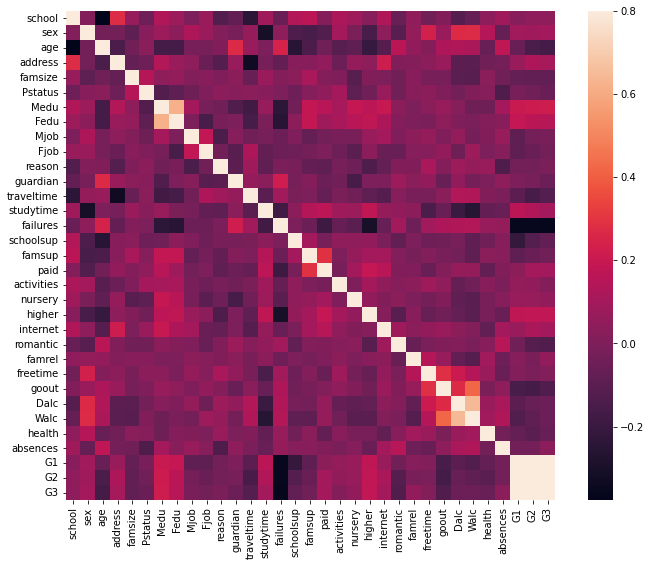

In [51]:
corrMatrix = df_std.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, vmax=.8, square=True);

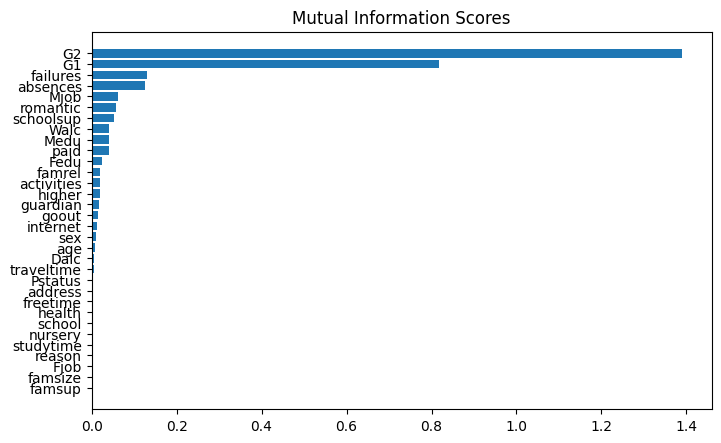

In [52]:
X = df_std.copy()
y = X.pop("G3")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [96]:
features = ['age', 'sex','famsize', 'Mjob', 'reason', 'traveltime', 'failures', 'schoolsup', 'paid', 'activities', 'higher', 'internet',
            'romantic', 'goout','Dalc', 'absences', 'G1', 'G2']
inputs = df_std[features]
inputs

,age,sex,famsize,Mjob,reason,traveltime,failures,schoolsup,paid,activities,higher,internet,romantic,goout,Dalc,absences,G1,G2
0,18,0,1,0,2,2,0,1,0,0,1,0,0,4,1,0.080000,0.1250,0.315789
1,17,0,1,0,2,1,0,0,0,0,1,1,0,3,1,0.053333,0.1250,0.263158
2,15,0,0,0,3,1,3,1,1,0,1,1,0,2,2,0.133333,0.2500,0.421053
3,15,0,1,1,0,1,0,0,1,1,1,1,1,2,1,0.026667,0.7500,0.736842
4,16,0,1,4,0,1,0,0,1,0,1,0,0,2,1,0.053333,0.1875,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,0,2,2,1,2,0,1,0,1,0,0,4,4,0.146667,0.3750,0.473684
391,17,1,0,2,2,2,0,0,0,0,1,1,0,5,3,0.040000,0.6875,0.842105
392,21,1,1,4,2,1,3,0,0,0,1,0,0,3,3,0.040000,0.4375,0.421053
393,18,1,0,2,2,3,0,0,0,0,1,1,0,1,3,0.000000,0.5000,0.631579


In [97]:
X_train, X_test, y_train, y_test = train_test_split(inputs,y, test_size = 0.20, random_state=44)
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=1)
    model.fit(train_X, train_y)
    grad = model.predict(val_X)
    MAE = mean_absolute_error(val_y, grad)
    print(model.score(val_X, val_y)) 
    return MAE
score_dataset(X_train, X_test, y_train, y_test)

0.8319992959972413


0.05841772151898733